<a href="https://colab.research.google.com/github/mona-jha/Computer_Vision/blob/main/rvl_cdip_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import numpy as np
import pandas as pd
import random as rn

import tensorflow as tf
import keras

from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPool2D,Activation,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [ ]:
dir_path = '/kaggle/input/rvlcdip/'
os.listdir(dir_path)

['labels_final.csv', 'data_final']

In [ ]:
traindf = pd.read_csv('/kaggle/input/rvlcdip/labels_final.csv')
traindf.head()

path  label
0  imagesv/v/o/h/voh71d00/509132755+-2755.tif      3
1        imagesl/l/x/t/lxt19d00/502213303.tif      3
2       imagesx/x/e/d/xed05a00/2075325674.tif      2
3  imageso/o/j/b/ojb60d00/517511301+-1301.tif      3
4       imagesq/q/z/k/qzk17e00/2031320195.tif      7

In [ ]:
traindf['path'].head()

0    imagesv/v/o/h/voh71d00/509132755+-2755.tif
1          imagesl/l/x/t/lxt19d00/502213303.tif
2         imagesx/x/e/d/xed05a00/2075325674.tif
3    imageso/o/j/b/ojb60d00/517511301+-1301.tif
4         imagesq/q/z/k/qzk17e00/2031320195.tif
Name: path, dtype: object

In [ ]:
print(image.shape)

AttributeError: shape

In [ ]:
imarray = np.array(image)
print(imarray.shape)

(1000, 754)


In [ ]:
image = '/content/dogs_vs_cats/train/dogs/dog.1000.jpg'

import cv2

img = cv2.imread(image_path)

# If the image is loaded successfully, print its pixel values
if img is not None:
    print(img)
    print(img.shape)
else:
    print("The image could not be loaded. Please check the path and file permissions.")

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
(1000, 754, 3)


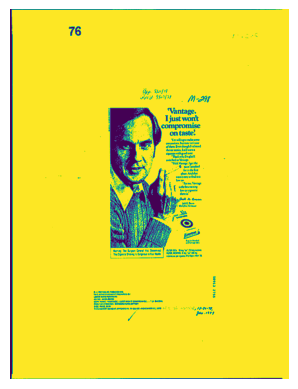

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display a .tif image
image_path = '/kaggle/input/rvlcdip/data_final/imagesv/v/o/h/voh71d00/509132755+-2755.tif'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
traindf['label'].value_counts()

label
0     3016
13    3007
14    3006
12    3006
3     3005
8     3003
9     3002
10    3002
7     3000
5     2999
15    2996
1     2994
4     2994
2     2993
11    2992
6     2985
Name: count, dtype: int64

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                            rescale = 1./255,
                                                            rotation_range = 10,
                                                            width_shift_range = 0.1,
                                                            height_shift_range = 0.1,
                                                            shear_range = 0.1,
                                                            zoom_range = 0.1,
                                                            horizontal_flip = True,
                                                            validation_split = 0.2)

In [ ]:
train_generator = datagen.flow_from_dataframe(dataframe= traindf,
                                              directory='/kaggle/input/rvlcdip/data_final/',
                                              x_col = 'path',
                                              y_col = 'label',
                                              subset = 'training',
                                              batch_size=100,
                                              seed=42,
                                              shuffle=True,
                                              class_mode="raw",
                                              target_size=(224,224))

Found 38400 validated image filenames.


# While passing the data to traininf, it will do data aug
# It laoded the augemented images during the batch.

In [ ]:
images, labels = next(train_generator)
print(len(images), len(labels))

100 100


In [ ]:
print(labels)

[11  5  4  0  0 14  0  3 11 12 11 14  2  2  6  2  0  1  4 10  7  2  4  5
  9  2 12 10  1  4 11 10 14  8  8  7  7  8 10  6 10 10  2  7 13  7  1  5
 14  9  4  4  8 11 15  4  7  4  0  4  8  9  8 11  0  3  3 10 12  3 14 12
 14  0 13 11  8 14  0  1  6  7 14 10 14  2  9  9 10  2  4 15  6 15  5  2
  5 14  8  9]


In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)


AttributeError: 'DataFrameIterator' object has no attribute 'class_indices'

In [ ]:
valid_generator = datagen.flow_from_dataframe(dataframe= traindf,
                                              directory='/kaggle/input/rvlcdip/data_final/',
                                              x_col = 'path',
                                              y_col = 'label',
                                              subset = 'validation',
                                              batch_size=100,
                                              seed=42,
                                              shuffle=True,
                                              class_mode="raw",
                                              target_size=(224,224))

Found 9600 validated image filenames.


# Custom CNN Model from Scratch

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(224, 224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'softmax'), # 16 classes probability of all 16 classes.
])


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,256 (42.64 MB)

 Trainable params: 11,178,256 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping, TensorBoard
import os
import datetime


In [ ]:
checkpoint_path = "kaggle/working/model_checkpoints/weights.{epoch:02d}-{val_loss:2f}.keras"
log_dir = "/kaggle/working/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


# Epoch 1 - Weights.keras
# epoch 2 - Weights.keras

# Naming format - "weights.{epoch:02d}-{val_loss:2f}.keras"

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                   save_best_only=True,
                                   monitor='val_loss',
                                   mode='min',
                                   verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
board = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [model_checkpoint, reduce_lr, early_stop, board]


# e1 - 0.7 ( check point )
# e2 - 0.71
# e3 - 0.72
# e4 - 0.75
# e5 - 0.8
# stop the training- restore my check point.

# reduce my lr
# e4 - 0.65
# when ever there is improvement, i want the model to be saved.

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │         1,040 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,256 (42.64 MB)

 Trainable params: 11,178,256 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# 100 images
# augmented and passed

In [ ]:
history = model.fit(
                    train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    callbacks=callbacks
                    )

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724594050.928716    1111 service.cc:145] XLA service 0x7dd3c4007d60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724594050.928774    1111 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724594050.928789    1111 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1724594063.086964    1111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2211 - loss: 2.4411

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.77117, saving model to kaggle/working/model_checkpoints/weights.01-1.771168.keras
384/384 ━━━━━━━━━━━━━━━━━━━━ 1224s 3s/step - accuracy: 0.2213 - loss: 2.4403 - val_accuracy: 0.4468 - val_loss: 1.7712 - learning_rate: 0.0010
Epoch 2/50
274/384 ━━━━━━━━━━━━━━━━━━━━ 3:30 2s/step - accuracy: 0.4563 - loss: 1.7330

India pe - airtel Telekom business.
140 crore prople.
airtels - Broadband routers.
airtel - 2 million customer ( broadband )

every 2 min, you data point ( each recrod is a row )
1 device - 24 hours - 30 records per hour. (24*30 = 720 rows per device per day.
5 years data.

5 * 2000000 * 720 =

In [ ]:
tf.keras.model.load()

save and load

In [ ]:
# Model.save -
save the architeture
save the weights
save any other paramaters


# model.save-wrights
only saving the weight paramater ( kernels ) - Keep the size low for the model.


# dummy architecutre